# Lab 6 - Data Visualization with Seaborn

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [63]:
w3 = pd.read_csv("nfloffenseweek3.csv")
w4 = pd.read_csv('nfloffenseweek4.csv')
w5 = pd.read_csv('nfloffenseweek5.csv')
w6 = pd.read_csv('nfloffenseweek6.csv')
w7 = pd.read_csv('nfloffenseweek7.csv')
w3["Week"] = 3
w4["Week"] = 4
w5["Week"] = 5
w6["Week"] = 6
w7["Week"] = 7
df= pd.concat([w3,w4,w5,w6,w7], axis =0)
extra = pd.read_csv('nfl_teams.csv')
df = extra.merge(df,left_on="Name", right_on = "team", how= 'inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          145 non-null    int64  
 1   Name                        145 non-null    object 
 2   Abbreviation                145 non-null    object 
 3   Conference                  145 non-null    object 
 4   Division                    145 non-null    object 
 5   rank                        145 non-null    int64  
 6   team                        145 non-null    object 
 7   games                       145 non-null    int64  
 8   points_scored               145 non-null    int64  
 9   total_yards                 145 non-null    int64  
 10  offensive_plays             145 non-null    int64  
 11  yards_per_play              145 non-null    float64
 12  turnovers_lost              145 non-null    int64  
 13  fumbles_lost                145 non

2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

Text(0, 0.5, 'Team')

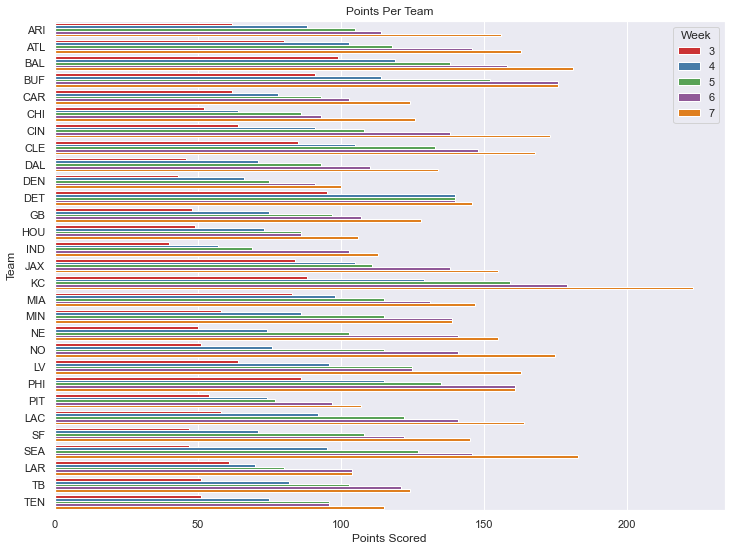

In [64]:
df.groupby("Abbreviation").points_scored.mean()

sns.barplot(x=df.points_scored, y=df.Abbreviation, hue= df.Week, data = df, palette="Set1")
plt.title("Points Per Team")
plt.xlabel("Points Scored")
plt.ylabel("Team")

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

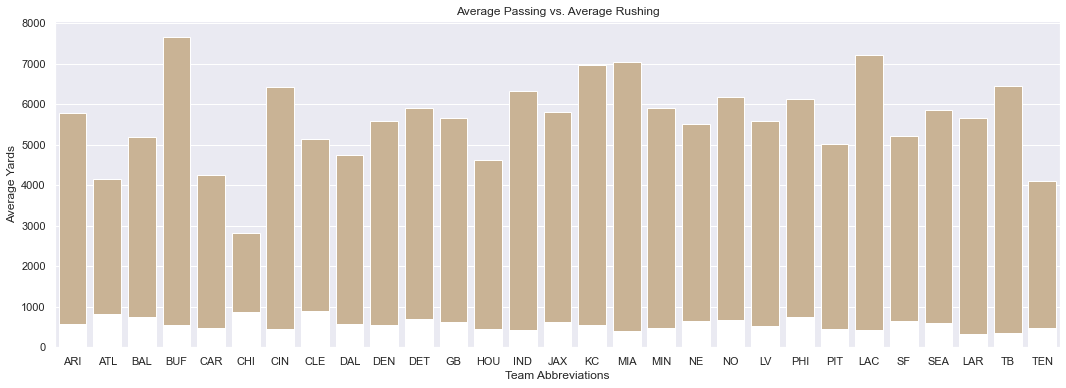

In [87]:
# plt.figure(figsize = [16,8])
# sns.barplot( data=df , x=df.Abbreviation, y=df.rushing_yards, si=False, color="red")
# sns.barplot( data=df , x=df.Abbreviation, y=df.passing_yards, si=False, estimator=np.sum, colors="blue")
# top=mp.Patch(color='red', label= 'Rushing Yards')
# bottom=mp.Patch(color='blue', label='Passing Yards')
# plt.legend(handles=[top,bottom])
# plt.ylabel=("Total Yards")
# plt.title("Average Passing and Rushing Yards")
# # 

sns.set(rc ={'figure.figsize':(18,6)})
sns.barplot ( x=df.Abbreviation, y = df.passing_yards, data=df, ci = False, estimator =np.sum, color ="tan")
sns.barplot(x=df.Abbreviation, y=df.rushing_yards, data=df, ci = False, color = 'white')
plt.title('Avg Passing vs. Avg Rushing')
plt.xlabel("Team Abbrev")
plt.ylabel("Avg Yards")
plt.show()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

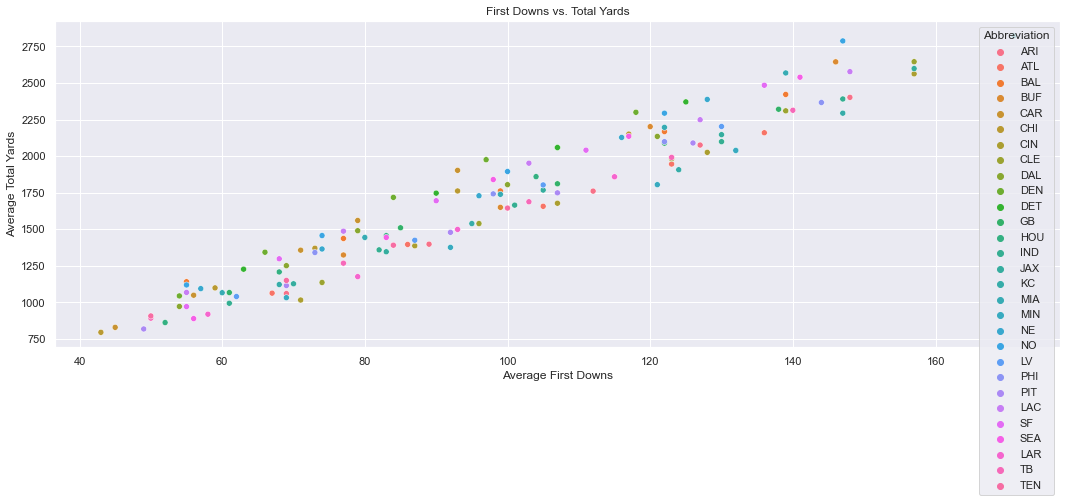

In [88]:
df.groupby("team").total_yards

sns.scatterplot(x=df['1st_downs'], y=df.total_yards, hue=df.Abbreviation, data=df)
plt.title("First Downs vs. Total Yards")
plt.xlabel("Average First Downs")
plt.ylabel("Average Total Yards")
plt.show()

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

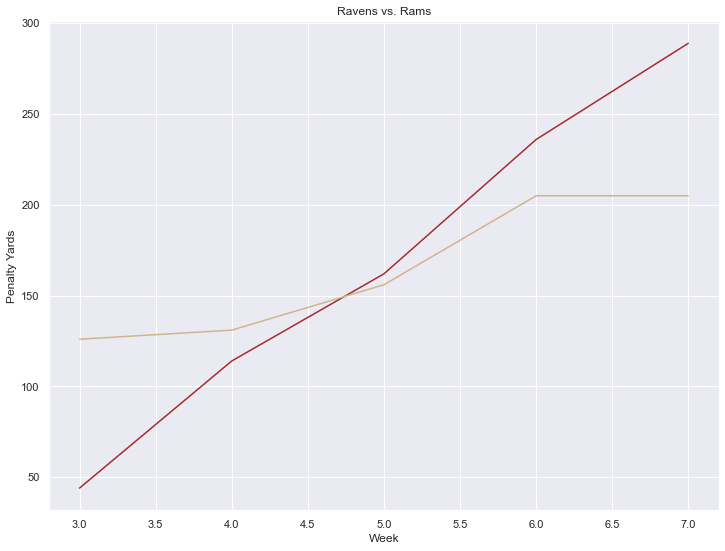

In [89]:
sns.set(rc ={'figure.figsize':(12,9)})
raven = df[(df.Name== "Baltimore Ravens")]
ram=df[(df.Name=="Los Angeles Rams")]
sns.lineplot(x=raven.Week, y=raven.penalty_yards, data = df, color = "brown")
sns.lineplot(x=ram.Week, y= ram.penalty_yards, data=df, color="tan")
plt.title("Ravens vs. Rams")
plt.xlabel("Week")
plt.ylabel("Penalty Yards")
plt.show()

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

/var/folders/pg/6p7fw10j1155dz2t00ntst440000gn/T/ipykernel_11046/3727222063.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("team")['points_scored', 'yards_per_play'].mean()


Text(0, 0.5, 'Total Points')

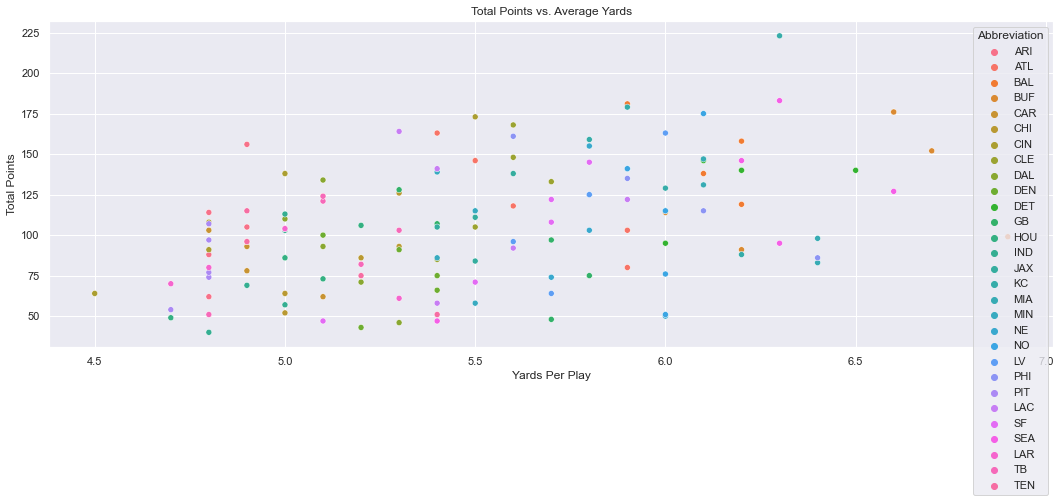

In [115]:
df.groupby("team")['points_scored', 'yards_per_play'].mean()


sns.scatterplot(x=df.yards_per_play, y=df.points_scored, data=df, hue=df.Abbreviation)
plt.title("Total Points vs. Average Yards")
plt.xlabel("Yards Per Play")
plt.ylabel("Total Points")

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

Text(0, 0.5, 'Penalty Yards')

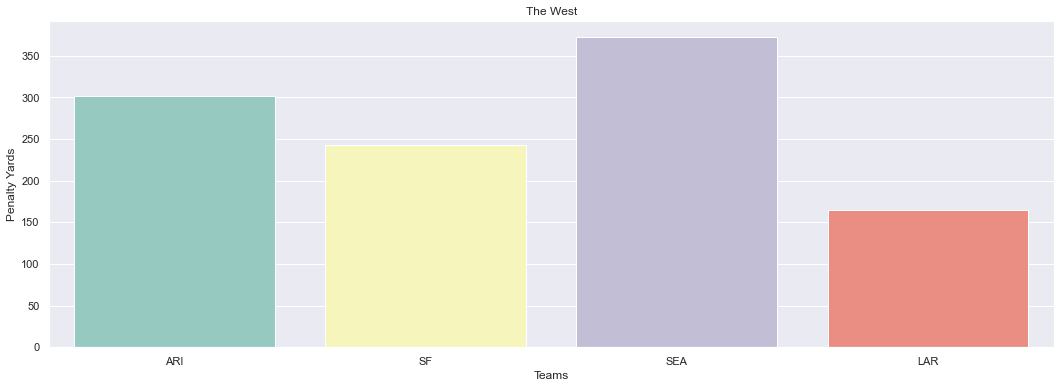

In [116]:
the_west = df[(df.Conference == "NFC") & (df.Division == "West")]

sns.set(rc ={'figure.figsize':(18,6)})
sns.barplot(x=the_west.Abbreviation,y=df.penalty_yards, data= the_west, ci = False, palette="Set3")
plt.title("The West")
plt.xlabel("Teams")
plt.ylabel("Penalty Yards")

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

Text(0, 0.5, 'Conference and Division')

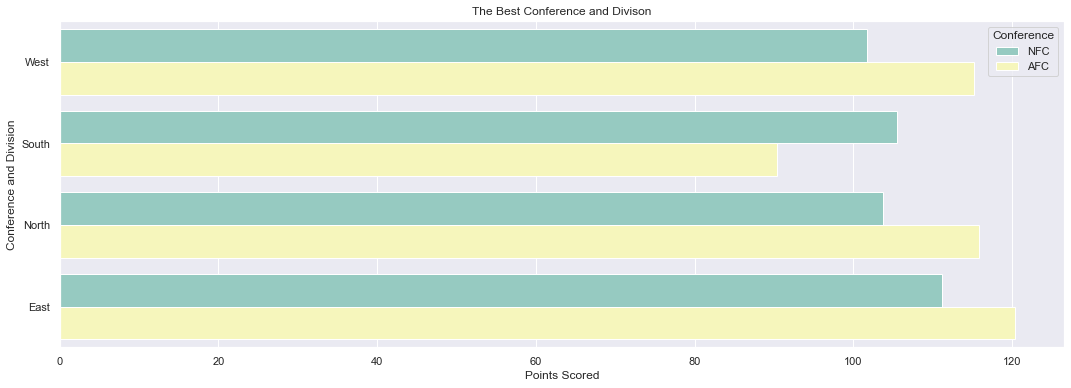

In [117]:
sns.barplot(x=df.points_scored, y=df.Division, data=df, hue =df.Conference, ci = False, palette="Set3")
plt.title("The Best Conference and Divison")
plt.xlabel("Points Scored")
plt.ylabel("Conference and Division")